**Importing dependencies**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data collection

In [58]:
#loading dataset to a pandas dataframe
wine_data=pd.read_csv('/content/winequality_dataset.csv')

In [59]:
#number of rows and columns in the dataset
wine_data.shape

(1599, 12)

In [60]:
#first 5rows of the data set
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
#checking for missing values
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0



Data Analysis and visualization
---



In [62]:
#statistical measures of the dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


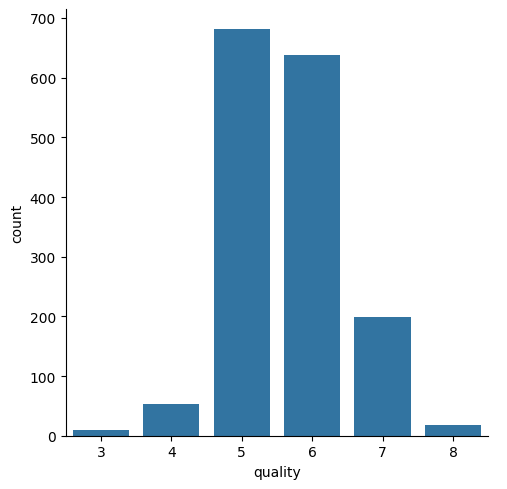

In [63]:
#number of values for each quality
sns.catplot(x='quality',data=wine_data,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

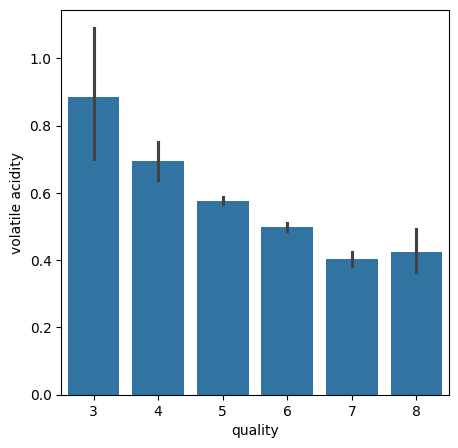

In [64]:
# volatile acidity vs quality columns
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

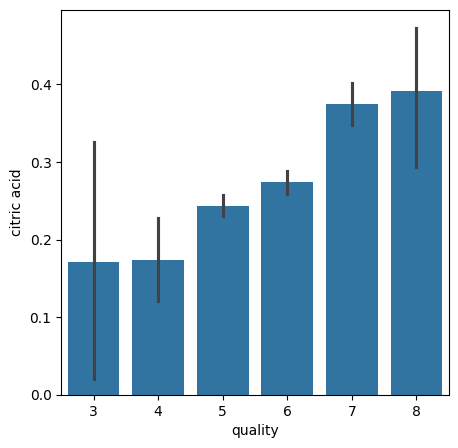

In [65]:
#citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_data)


<Axes: xlabel='quality', ylabel='residual sugar'>

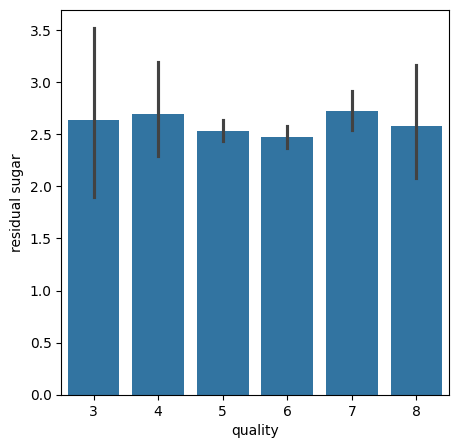

In [66]:
 #residual sugars vs quality
 plot=plt.figure(figsize=(5,5))
 sns.barplot(x='quality',y='residual sugar',data=wine_data)

<Axes: xlabel='quality', ylabel='chlorides'>

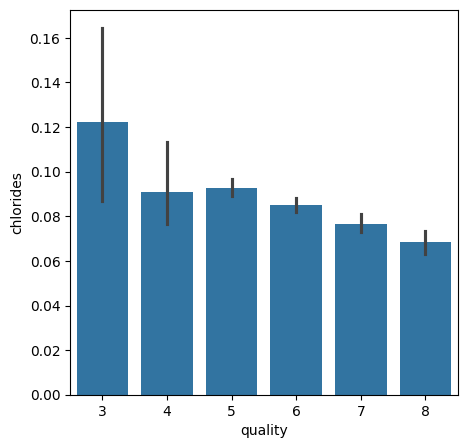

In [67]:
#chlorides vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=wine_data)

Correlation


1.positive correlation
2.negative correlation

In [68]:
correlation=wine_data.corr()

In [69]:
#constructing heatmap to understand the correlation between the columns
plot=plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Axes: >

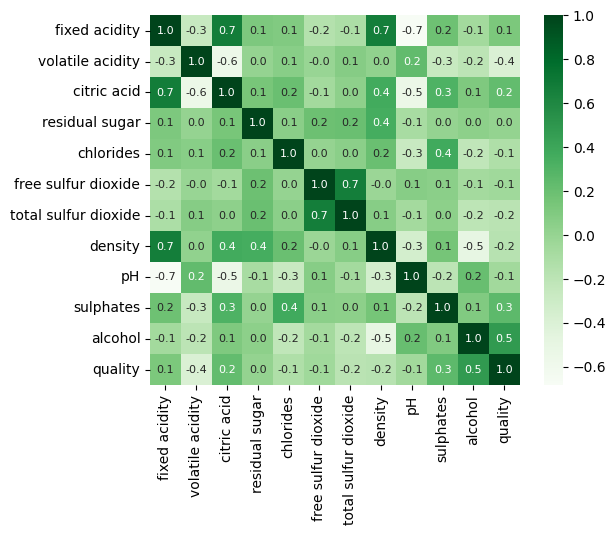

In [70]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

Data Preprocessing

In [71]:
# separating the data and the label
X=wine_data.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

Label binarization

In [72]:
Y=wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [73]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & test split

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [75]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


Model Training

** Random Forest Classifier **

In [76]:
model=RandomForestClassifier()

In [77]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy score

In [78]:
#accuracy on test data
X_test_prediction=model.predict(X_test)

In [79]:
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [80]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.909375


Building a predictive system

In [87]:
# Ask user to enter values
print("Enter the 11 input values separated by commas:")
user_input = input()   # Example: 7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0

# Convert string input to list of floats
input_data = [float(x) for x in user_input.split(",")]

#input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0) good quality wine
#input_data=(7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4) bad quality wine

#changing the input data to numpy array
input_data_as_np_array=np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped=input_data_as_np_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(int(prediction))

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Enter the 11 input values separated by commas:
4.6,0.52,0.15,2.1,0.054000000000000006,8.0,65.0,0.9934,3.9,0.56,13.1
0
Bad Quality Wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-24484807.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(prediction))
